**Purpose**:

# Imports Always First

In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# Simulating Cluster Data

In [3]:
make_blobs?

Signature: make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int, optional (default=100)
    The total number of points equally divided among clusters.

n_features : int, optional (default=2)
    The number of features for each sample.

centers : int or array of shape [n_centers, n_features], optional
    (default=3)
    The number of centers to generate, or the fixed center locations.

cluster_std : float or sequence of floats, optional (default=1.0)
    The standard deviation of the clusters.

center_box : pair of floats (min, max), optional (default=(-10.0, 10.0))
    The bounding box for each cluster center when centers are
    generated at random.

shuffle : boolean, optional (default=True)
    Shuffle the samples.

random_state : int, RandomState instanc

In [4]:
dataset, target = make_blobs(n_samples=1000, cluster_std=[5, 1, 0.5], random_state=42)

In [5]:
dataset

array([[-6.73798326, -7.00956208],
       [-6.50857951, -6.7304633 ],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.1607112 , -6.98472053]])

In [6]:
target

array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0,
       0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2,

In [14]:
plt.title?

Signature: plt.title(s, *args, **kwargs)
Docstring:
Set a title of the current axes.

Set one of the three available axes titles. The available titles are
positioned above the axes in the center, flush with the left edge,
and flush with the right edge.

.. seealso::
    See :func:`~matplotlib.pyplot.text` for adding text
    to the current axes

Parameters
----------
label : str
    Text to use for the title

fontdict : dict
    A dictionary controlling the appearance of the title text,
    the default `fontdict` is:

        {'fontsize': rcParams['axes.titlesize'],
        'fontweight' : rcParams['axes.titleweight'],
        'verticalalignment': 'baseline',
        'horizontalalignment': loc}

loc : {'center', 'left', 'right'}, str, optional
    Which title to set, defaults to 'center'

Returns
-------
text : :class:`~matplotlib.text.Text`
    The matplotlib text instance representing the title

Other parameters
----------------
kwargs : text properties
    Other keyword arguments are

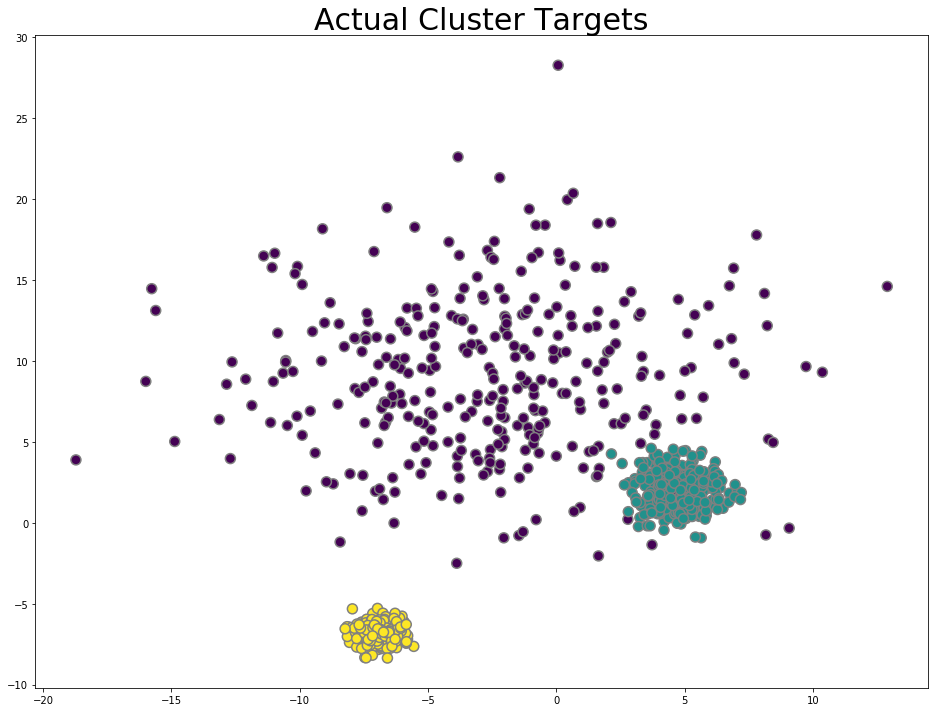

In [15]:
plt.figure(figsize=(16, 12))
plt.scatter(dataset[:, 0], dataset[:, 1], 
            c=target, 
            edgecolors='grey', 
            linewidths=1.5, 
            s=100, 
            cmap=plt.get_cmap('viridis'))
plt.title('Actual Cluster Targets', fontdict={'fontsize': 30})
plt.show()

# Implementing Gaussian Mixture

In [9]:
model_gmm = GaussianMixture(n_components=3)
fit_gmm = model_gmm.fit(dataset)
pred_gmm = fit_gmm.predict(dataset)

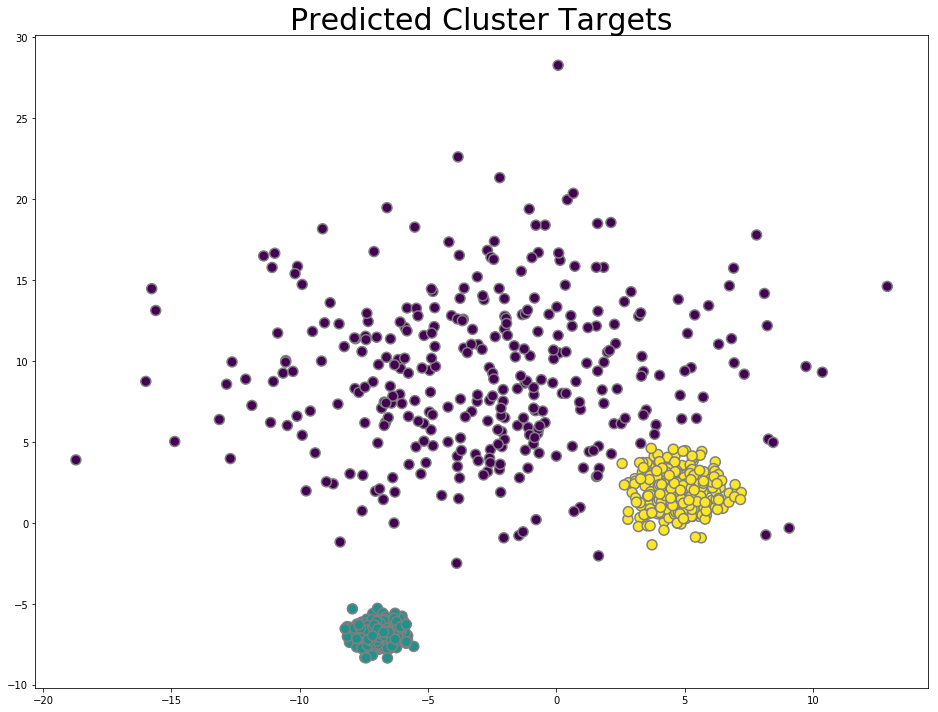

In [16]:
plt.figure(figsize=(16, 12))
plt.scatter(dataset[:, 0], dataset[:, 1], 
            c=pred_gmm, 
            edgecolors='grey', 
            linewidths=1.5, 
            s=100, 
            cmap=plt.get_cmap('viridis'))
plt.title('Predicted Cluster Targets', fontdict={'fontsize': 30})
plt.show()

In [18]:
adjusted_rand_score(target, pred_gmm)

0.9762295092463151